
# Dataset description

* This dataset describes the medical records for Pima Indians
and is used to predict whether or not a patient has diabetes, based on given features/diagnostic measurements.

* It is important to note that only *female* patients were considered *with at least 21 years old* of Pima Indian heritage.

* Inputs:

 * Pregnancies: Number of times pregnant
 * Oral Glucose Tolerance Test: glucose concentration in blood  (mg/dL) 
 * BloodPressure: Diastolic blood pressure (mm Hg)
 * Skin: Triceps skin fold thickness (mm)
 * Insulin: 2-Hour serum insulin (mu U/ml)
 * BMI: Body mass index (weight in kg/(height in m)^2)
 * DiabetesPedigreeFunction: Diabetes pedigree function
 * Age: Age (years)

* Outputs:

 * Diabetes or no diabetes (0 or 1)



# Import Libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
diabetesData = pd.read_csv('/content/drive/My Drive/Colab Notebooks/diabetesClassification.csv')

In [ ]:
diabetesData

Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]

In [ ]:
diabetesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetesData.describe()

Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]

# CLEAN UP AND VISUALIZE DATASET


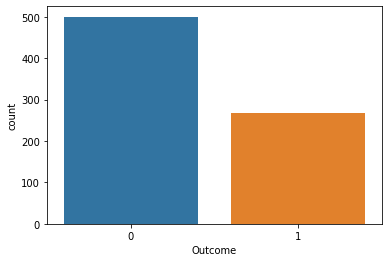

In [ ]:
sns.countplot(x = 'Outcome', data = diabetesData)

We can see that the dataset is pretty balanced, which is good news, since it means less data preprocessing and work ini generaal to avoid unbalnced dataset problems

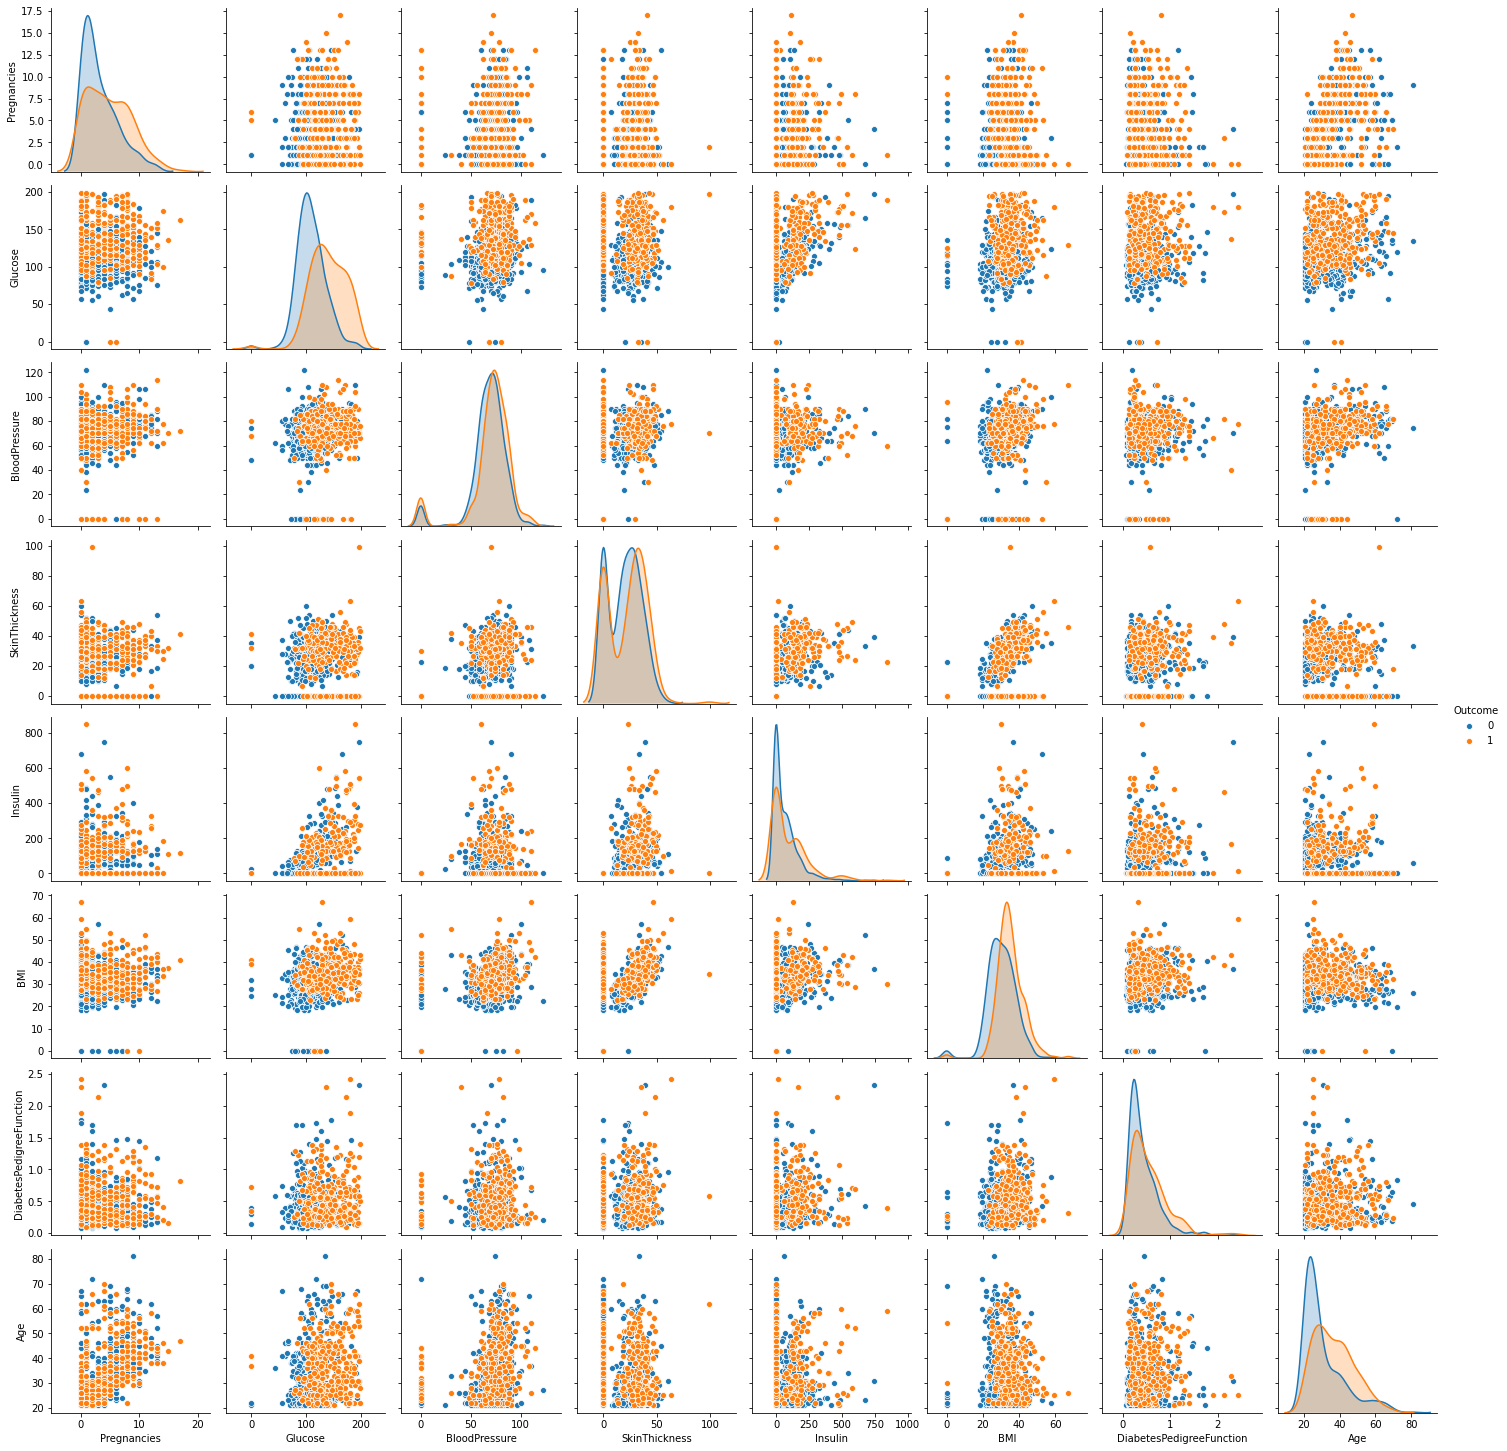

In [ ]:
sns.pairplot(diabetesData, hue = 'Outcome', vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

The data does not appear to be linearly seperable, which justifies trying to use more complex, non linear models such as ANN, Random Forest and XGBoost.

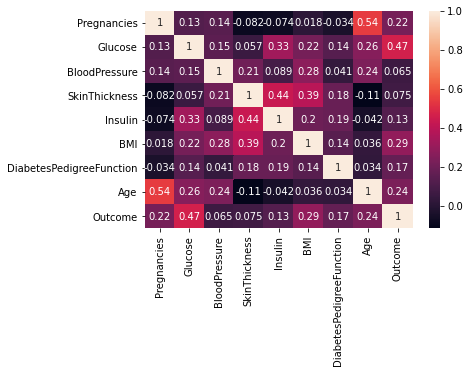

In [ ]:
sns.heatmap(diabetesData.corr(), annot = True)

there does not seem to be much correlation in the data, highest value being correlattiioon between Glucose and Outcome (0.47) which could be expected from a complicated dataset such as this one.

Let's start building our features matrix X and our outcome/prediction vector y!

In [ ]:
X = diabetesData.iloc[:, 0:8].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y = diabetesData.iloc[:, 8].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

# ANN

In [ ]:
|from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(random_state=0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'activation': ['relu', 'tanh',  'logistic'], 
               'alpha': [0.03, 0.02, 0.01, 0.001], 
               'early_stopping': [ False, True], 
               'hidden_layer_sizes': range(100, 400, 50),
               'solver': ['lbfgs', 'sgd', 'adam'],
               'learning_rate': ['constant','adaptive', 'invscaling']}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


In [ ]:
best_accuracy

0.7900483968542045

In [ ]:
best_parameters 


{'activation': 'tanh',
 'alpha': 0.01,
 'early_stopping': True,
 'hidden_layer_sizes': 150,
 'learning_rate': 'constant',
 'solver': 'adam'}

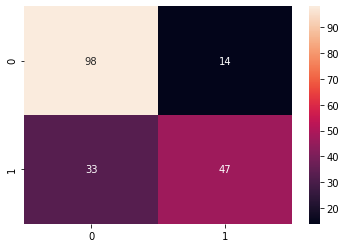

In [ ]:
# Test Set Performance
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       112
           1       0.77      0.59      0.67        80

    accuracy                           0.76       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.76      0.76      0.75       192



In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = mlp, X = X_train, y = y_train, cv = 10)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Random Forest

In [ ]:
diabetesDataRF = pd.read_csv('/content/drive/My Drive/Colab Notebooks/diabetesClassification.csv')

In [ ]:
X = diabetesData.iloc[:, 0:8].values
y = diabetesData.iloc[:, 8].values


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'gini', random_state = 0, max_depth=10, min_samples_leaf=8)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1])

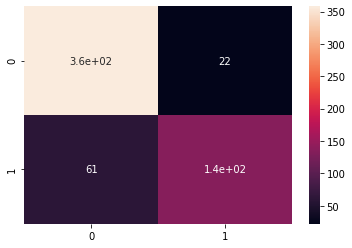

In [ ]:
from sklearn.metrics import confusion_matrix

y_train_pred = classifier.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

       False       0.94      0.85      0.90       419
        True       0.69      0.86      0.76       157

    accuracy                           0.86       576
   macro avg       0.82      0.86      0.83       576
weighted avg       0.87      0.86      0.86       576



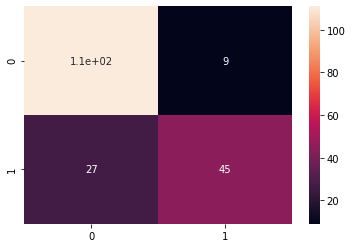

In [ ]:
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       120
           1       0.83      0.62      0.71        72

    accuracy                           0.81       192
   macro avg       0.82      0.78      0.79       192
weighted avg       0.82      0.81      0.81       192



In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.std()

0.03160628624698675

In [ ]:
accuracies.mean()

0.7430732002419842

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [250, 450, 500, 550, 750], 'criterion': ['entropy', 'gini'], 'max_depth': [ 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [8, 9, 10, 11, 12, 14, 20]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


In [ ]:
best_accurracy

0.7605868118572292

In [ ]:
best_parameters

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 11,
 'n_estimators': 500}

In [ ]:
classifier = RandomForestClassifier(n_estimators = 450, criterion = 'gini', random_state=0, max_depth =7, min_samples_leaf = 11)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=450,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

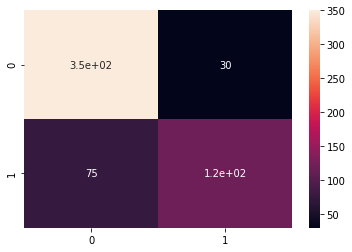

In [ ]:
from sklearn.metrics import confusion_matrix

y_train_pred = classifier.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

       False       0.92      0.82      0.87       425
        True       0.62      0.80      0.70       151

    accuracy                           0.82       576
   macro avg       0.77      0.81      0.78       576
weighted avg       0.84      0.82      0.82       576



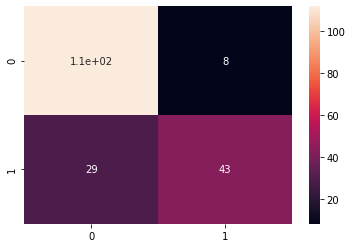

In [ ]:
from sklearn.metrics import classification_report

# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86       141
           1       0.60      0.84      0.70        51

    accuracy                           0.81       192
   macro avg       0.77      0.82      0.78       192
weighted avg       0.84      0.81      0.82       192



Random Forest Model has seem to improved 

# XGBoost

In [ ]:
diabetesDataXGB = pd.read_csv('/content/drive/My Drive/Colab Notebooks/diabetesClassification.csv')

In [ ]:
X = diabetesDataXGB.iloc[:, 0:8].values
y = diabetesDataXGB.iloc[:, 8].values

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

{'gamma': 0.2,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 160,
 'reg_lambda': 0.5}

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(gamma=0.2, learning_rate=0.1, max_depth = 2, n_estimators = 160, reg_lambda= 0.5)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=160, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0])

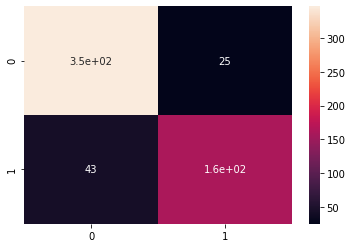

In [ ]:
from sklearn.metrics import confusion_matrix

y_train_pred = classifier.predict(X_train)
# y2_train_pred = (y1_train_pred > 0.5)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       390
           1       0.79      0.87      0.83       186

    accuracy                           0.88       576
   macro avg       0.86      0.88      0.87       576
weighted avg       0.89      0.88      0.88       576



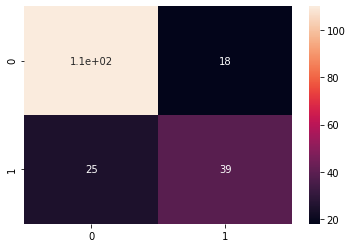

In [ ]:
# Testing Set Performance
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       128
           1       0.68      0.61      0.64        64

    accuracy                           0.78       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.std()

0.05117846660352892

In [ ]:
accuracies.mean()

0.7725045372050816

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{ 'max_depth': range (2, 12, 1),
                'n_estimators': range(60, 260, 20),
                'learning_rate': [0.3, 0.2, 0.1, 0.01, 0.02, 0.03],
                'gamma': [0, 0.1, 0.2, 0.3, 0.4], 
                'reg_lambda': [0.4, 0.6, 0.8, 1, 1.2],
                'reg_alpha': [0, 0.1, 0.2,0.3,0.4,0.5]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accurracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [ ]:
best_accurracy

0.8471262615999459

In [ ]:
best_parameters

{'gamma': 0.2,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 160,
 'reg_lambda': 0.5}

# Naive Bayes

In [ ]:
diabetesData = pd.read_csv('/content/drive/My Drive/Colab Notebooks/diabetesClassification.csv')

In [ ]:
X = diabetesData.iloc[:, 0:8].values
y = diabetesData.iloc[:, 8].values

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

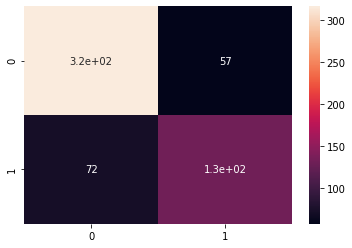

In [ ]:
from sklearn.metrics import confusion_matrix

y_train_pred = classifier.predict(X_train)
# y2_train_pred = (y1_train_pred > 0.5)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       388
           1       0.65      0.70      0.67       188

    accuracy                           0.78       576
   macro avg       0.75      0.76      0.75       576
weighted avg       0.78      0.78      0.78       576



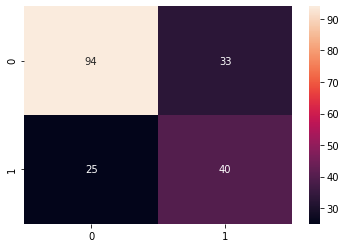

In [ ]:
# Testing Set Performance
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       127
           1       0.55      0.62      0.58        65

    accuracy                           0.70       192
   macro avg       0.67      0.68      0.67       192
weighted avg       0.71      0.70      0.70       192



# Creating ensemble model with ANN, RF and XGboost

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

clf1 = MLPClassifier(activation= 'tanh', alpha = 0.01, early_stopping= True, hidden_layer_sizes= 150, learning_rate= 'constant', solver = 'adam')
clf2 = RandomForestClassifier(n_estimators = 500, criterion = 'gini', max_depth=10, min_samples_leaf=8)
clf3 = XGBClassifier(gamma=0.2,learning_rate=0.1, max_depth=2, n_estimators=160, reg_lambda = 0.5)

labels = ['ANN', 'Random Forest', 'XGboost']

for clf, label in zip([clf1, clf2, clf3], labels):

    scores = cross_val_score(clf, X, y, 
                                              cv=10, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

Accuracy: 0.75 (+/- 0.05) [ANN]
Accuracy: 0.77 (+/- 0.05) [Random Forest]
Accuracy: 0.76 (+/- 0.05) [XGboost]


In [ ]:
voting_clf_hard = VotingClassifier(estimators = [(labels[0], clf1),
                                                 (labels[1], clf2),
                                                 (labels[2], clf3)],
                                   voting = 'hard')

In [ ]:
voting_clf_soft = VotingClassifier(estimators = [(labels[0], clf1),
                                                 (labels[1], clf2),
                                                 (labels[2], clf3)],
                                   voting = 'soft')

In [ ]:

labels_new = ['ANN', 'Random Forest', 'XGboost',
              'Voting_Classifier_Hard', 'Voting_Classifier_Soft']

for (clf, label) in zip([clf1, clf2, clf3, voting_clf_hard,
                        voting_clf_soft], labels_new):
    scores = cross_val_score(clf, X, y, cv=5,
            scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

Accuracy: 0.75 (+/- 0.01) [ANN]
Accuracy: 0.77 (+/- 0.04) [Random Forest]
Accuracy: 0.74 (+/- 0.04) [XGboost]
Accuracy: 0.77 (+/- 0.04) [Voting_Classifier_Hard]
Accuracy: 0.77 (+/- 0.03) [Voting_Classifier_Soft]


In [ ]:
voting_clf_soft.fit(X, y)

VotingClassifier(estimators=[('ANN',
                              MLPClassifier(activation='tanh', alpha=0.01,
                                            batch_size='auto', beta_1=0.9,
                                            beta_2=0.999, early_stopping=True,
                                            epsilon=1e-08,
                                            hidden_layer_sizes=150,
                                            learning_rate='constant',
                                            learning_rate_init=0.001,
                                            max_fun=15000, max_iter=200,
                                            momentum=0.9, n_iter_no_change=10,
                                            nesterovs_momentum=True,
                                            power_t=0.5, random_state=None,
                                            shuffle=...
                                            colsample_bynode=1,
                                            colsam

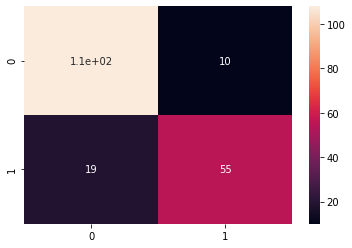

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = voting_clf_soft.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       118
           1       0.85      0.74      0.79        74

    accuracy                           0.85       192
   macro avg       0.85      0.83      0.84       192
weighted avg       0.85      0.85      0.85       192

